In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

In [2]:
#loading the dataset
df = pd.read_csv('IndianWeatherRepository.csv')
print(df.head())

  country location_name          region  latitude  longitude      timezone  \
0   India    Ashoknagar  Madhya Pradesh     24.57      77.72  Asia/Kolkata   
1   India        Raisen  Madhya Pradesh     23.33      77.80  Asia/Kolkata   
2   India    Chhindwara  Madhya Pradesh     22.07      78.93  Asia/Kolkata   
3   India         Betul  Madhya Pradesh     21.86      77.93  Asia/Kolkata   
4   India   Hoshangabad  Madhya Pradesh     22.75      77.72  Asia/Kolkata   

   last_updated_epoch      last_updated  temperature_celsius  \
0          1693286100  2023-08-29 10:45                 27.5   
1          1693286100  2023-08-29 10:45                 27.5   
2          1693286100  2023-08-29 10:45                 26.3   
3          1693286100  2023-08-29 10:45                 25.6   
4          1693286100  2023-08-29 10:45                 27.2   

   temperature_fahrenheit  ... air_quality_PM2.5  air_quality_PM10  \
0                    81.5  ...              12.6              18.5   
1     

In [3]:
#remove redundant attributes
col_to_remove=['country','latitude','longitude','timezone','last_updated_epoch','last_updated','temperature_celsius','wind_mph','wind_direction','pressure_in','precip_in','feels_like_celsius','visibility_miles','gust_mph','sunrise','sunset','moonrise','moonset','moon_phase','moon_illumination']
df = df.drop(columns=col_to_remove)
print(df.head())

  location_name          region  temperature_fahrenheit condition_text  \
0    Ashoknagar  Madhya Pradesh                    81.5  Partly cloudy   
1        Raisen  Madhya Pradesh                    81.5          Sunny   
2    Chhindwara  Madhya Pradesh                    79.3  Partly cloudy   
3         Betul  Madhya Pradesh                    78.1         Cloudy   
4   Hoshangabad  Madhya Pradesh                    81.0         Cloudy   

   wind_kph  wind_degree  pressure_mb  precip_mm  humidity  cloud  ...  \
0      20.5          281       1008.0        0.0        67     26  ...   
1      15.5          287       1008.0        0.0        70     19  ...   
2      18.4          317       1009.0        0.0        70     51  ...   
3      16.9          297       1009.0        0.0        76     65  ...   
4      16.2          274       1009.0        0.0        74     82  ...   

   uv_index  gust_kph  air_quality_Carbon_Monoxide  air_quality_Ozone  \
0       7.0      23.8                

region
Andaman and Nicobar Islands     1
Andhra Pradesh                 32
Arunachal Pradesh               2
Assam                          21
Bihar                          29
Chandigarh                      1
Chhattisgarh                   22
Dadra and Nagar Haveli          1
Daman and Diu                   2
Delhi                           2
Goa                             2
Gujarat                        23
Haryana                        20
Himachal Pradesh                5
Jammu and Kashmir              20
Jharkhand                      18
Karnataka                      23
Kerala                         14
Lakshadweep                     1
Madhya Pradesh                 48
Maharashtra                    32
Manipur                         8
Mizoram                         7
Nagaland                        6
Orissa                         25
Puducherry                      2
Punjab                         19
Rajasthan                      36
Tamil Nadu                     28
Tripura

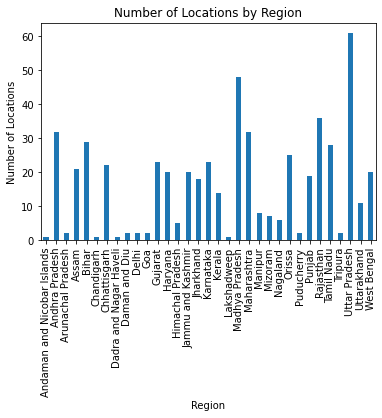

Udaipur          136
East Godavari    117
Siang            111
Barddhaman       102
Kolkata          100
                ... 
Hassan            69
Narsimhapur       69
Ghaziabad         69
Mancherial        69
Palghar           69
Name: location_name, Length: 543, dtype: int64


In [4]:
#location names per state/ UT
count=df.groupby('region')['location_name'].nunique()
print(count)
count.plot(kind='bar')
plt.title('Number of Locations by Region')
plt.xlabel('Region')
plt.ylabel('Number of Locations')
plt.show()
#conclusion: UP has the most no. of regions
#andaman has the readings for only one region

#frequency of each location
frequency = df['location_name'].value_counts()
print(frequency)

In [5]:
#different weather names used
distinct_values = df['condition_text'].unique().tolist()
print(distinct_values)
print("There are "+str(len(distinct_values))+" distinct weather types in the dataset")

['Partly cloudy', 'Sunny', 'Cloudy', 'Mist', 'Patchy rain possible', 'Overcast', 'Patchy light rain with thunder', 'Light rain shower', 'Moderate or heavy rain shower', 'Clear', 'Light rain', 'Torrential rain shower', 'Fog', 'Thundery outbreaks possible', 'Patchy light drizzle', 'Moderate rain', 'Patchy light rain', 'Moderate rain at times', 'Heavy rain', 'Heavy rain at times', 'Light drizzle', 'Moderate or heavy rain with thunder', 'Patchy snow possible', 'Moderate or heavy snow showers', 'Light snow showers', 'Moderate or heavy snow with thunder', 'Patchy light snow with thunder', 'Light sleet', 'Light freezing rain']
There are 29 distinct weather types in the dataset


In [6]:
#percentage of missing values
missing_values=df.isnull()
miss_percent=(missing_values.sum()/len(df))*100
missing_data=pd.DataFrame({'missing percent': miss_percent})
print(missing_data)

                              missing percent
location_name                             0.0
region                                    0.0
temperature_fahrenheit                    0.0
condition_text                            0.0
wind_kph                                  0.0
wind_degree                               0.0
pressure_mb                               0.0
precip_mm                                 0.0
humidity                                  0.0
cloud                                     0.0
feels_like_fahrenheit                     0.0
visibility_km                             0.0
uv_index                                  0.0
gust_kph                                  0.0
air_quality_Carbon_Monoxide               0.0
air_quality_Ozone                         0.0
air_quality_Nitrogen_dioxide              0.0
air_quality_Sulphur_dioxide               0.0
air_quality_PM2.5                         0.0
air_quality_PM10                          0.0
air_quality_us-epa-index          

therefore we can conclude that thaere are no missing values in the data set

In [7]:
#identify and remove duplicated rows
duplicated_rows=df.duplicated(keep=False)
print(duplicated_rows)
duplicate_data=df[duplicated_rows]
print(duplicate_data)
df=df.drop_duplicates(keep='first')
print('number of rows: ',df.shape[0])

0        False
1        False
2        False
3        False
4        False
         ...  
38297    False
38298    False
38299    False
38300    False
38301    False
Length: 38302, dtype: bool
       location_name          region  temperature_fahrenheit  \
1174         Udaipur       Rajasthan                    79.7   
1198   East Godavari  Andhra Pradesh                    79.9   
1281           Siang    Chhattisgarh                    77.0   
1364           Nagar    Chhattisgarh                    72.1   
1382         Kolkata     West Bengal                    86.0   
...              ...             ...                     ...   
37733          Siang    Chhattisgarh                    64.0   
37742  East Godavari  Andhra Pradesh                    77.0   
37748     Barddhaman     West Bengal                    71.1   
37860  East Godavari  Andhra Pradesh                    77.3   
38292  East Godavari  Andhra Pradesh                    77.3   

             condition_text  wind_kph  

In [8]:
#data type of each row
data_types = df.dtypes
print(data_types)

location_name                    object
region                           object
temperature_fahrenheit          float64
condition_text                   object
wind_kph                        float64
wind_degree                       int64
pressure_mb                     float64
precip_mm                       float64
humidity                          int64
cloud                             int64
feels_like_fahrenheit           float64
visibility_km                   float64
uv_index                        float64
gust_kph                        float64
air_quality_Carbon_Monoxide     float64
air_quality_Ozone               float64
air_quality_Nitrogen_dioxide    float64
air_quality_Sulphur_dioxide     float64
air_quality_PM2.5               float64
air_quality_PM10                float64
air_quality_us-epa-index          int64
air_quality_gb-defra-index        int64
dtype: object


In [9]:
#convert the int64 data to float64
df['humidity'] = df['humidity'].astype('float64')
df['wind_degree'] = df['wind_degree'].astype('float64')
df['cloud'] = df['cloud'].astype('float64')
df['air_quality_us-epa-index'] = df['air_quality_us-epa-index'].astype('float64')
df['air_quality_gb-defra-index'] = df['air_quality_gb-defra-index'].astype('float64')

data_types = df.dtypes
print(data_types)

location_name                    object
region                           object
temperature_fahrenheit          float64
condition_text                   object
wind_kph                        float64
wind_degree                     float64
pressure_mb                     float64
precip_mm                       float64
humidity                        float64
cloud                           float64
feels_like_fahrenheit           float64
visibility_km                   float64
uv_index                        float64
gust_kph                        float64
air_quality_Carbon_Monoxide     float64
air_quality_Ozone               float64
air_quality_Nitrogen_dioxide    float64
air_quality_Sulphur_dioxide     float64
air_quality_PM2.5               float64
air_quality_PM10                float64
air_quality_us-epa-index        float64
air_quality_gb-defra-index      float64
dtype: object


In [10]:
#now that we have cleaned the dataset we can move onto fitting the data into an ML Model. 
# to determine the weather let us first do logistic modeling
#according to the literature survey temperature, wind, precipitation, humidity, cloud are the parameters that will determine the weather at a place at a time. 
# the region and time of the day are excluded because they are redundant
# Import the required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
X = df.iloc[:, [2,4,5,6,8,9]].values
y = df.iloc[:, 3].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Create the logistic regression model
logistic_model = LogisticRegression(random_state=0, max_iter=9000)

# Train the model on the training set
logistic_model.fit(X_train, y_train)

# Predict the test set results
y_pred = logistic_model.predict(X_test)

# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy

KeyboardInterrupt: 

In [23]:
#now that we have cleaned the dataset we can move onto fitting the data into an ML Model. 
# to determine the weather let us first do logistic modeling
#according to the literature survey temperature, wind, precipitation, humidity, cloud are the parameters that will determine the weather at a place at a time. 
# the region and time of the day are excluded because they are redundant
# Import the required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
X = df.iloc[:, [2,4,5,6,8,9]].values
y = df.iloc[:, 3].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Create the logistic regression model
logistic_model = LogisticRegression(random_state=0, max_iter=10000)

# Train the model on the training set
logistic_model.fit(X_train, y_train)

# Predict the test set results
y_pred = logistic_model.predict(X_test)

# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6847807094181373

In [24]:
#now that we have cleaned the dataset we can move onto fitting the data into an ML Model. 
# to determine the weather let us first do logistic modeling
#according to the literature survey temperature, wind, precipitation, humidity, cloud are the parameters that will determine the weather at a place at a time. 
# the region and time of the day are excluded because they are redundant
# Import the required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
X = df.iloc[:, [2,4,5,6,8,9]].values
y = df.iloc[:, 3].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Create the logistic regression model
logistic_model = LogisticRegression(random_state=0, max_iter=11000)

# Train the model on the training set
logistic_model.fit(X_train, y_train)

# Predict the test set results
y_pred = logistic_model.predict(X_test)

# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6847807094181373

In [25]:
#now that we have cleaned the dataset we can move onto fitting the data into an ML Model. 
# to determine the weather let us first do logistic modeling
#according to the literature survey temperature, wind, precipitation, humidity, cloud are the parameters that will determine the weather at a place at a time. 
# the region and time of the day are excluded because they are redundant
# Import the required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
X = df.iloc[:, [2,4,6,8,9]].values
y = df.iloc[:, 3].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Create the logistic regression model
logistic_model = LogisticRegression(random_state=0, max_iter=9000)

# Train the model on the training set
logistic_model.fit(X_train, y_train)

# Predict the test set results
y_pred = logistic_model.predict(X_test)

# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6842565088240433

In [34]:
#now that we have cleaned the dataset we can move onto fitting the data into an ML Model. 
# to determine the weather let us first do logistic modeling
#according to the literature survey temperature, wind, precipitation, humidity, cloud are the parameters that will determine the weather at a place at a time. 
# the region and time of the day are excluded because they are redundant
# Import the required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
X = df.iloc[:, [2,4,5,6,8,9,11]].values
y = df.iloc[:, 3].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Create the logistic regression model
logistic_model = LogisticRegression(random_state=0, max_iter=50000)

# Train the model on the training set
logistic_model.fit(X_train, y_train)

# Predict the test set results
y_pred = logistic_model.predict(X_test)

# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy

c:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8547964354359602

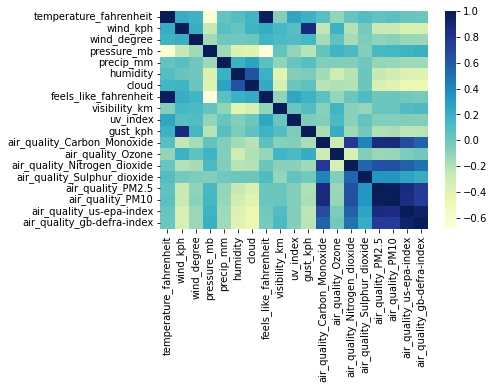

In [10]:
#since the accuracy has seen a significant increase we are going to stick with the current independent variables but due to the warning we might need to check for multicollinearity
corr_matrix=df.corr()
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr_matrix, cmap="YlGnBu")
plt.show()
#cloud is strongly related to humidity 

In [38]:
#removing cloud parameter
# Import the required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
X = df.iloc[:, [2,4,6,8,9,11]].values
y = df.iloc[:, 3].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Create the logistic regression model
logistic_model = LogisticRegression(random_state=1, max_iter=50000)

# Train the model on the training set
logistic_model.fit(X_train, y_train)

# Predict the test set results
y_pred = logistic_model.predict(X_test)

# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy

c:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8547090686702778

In [22]:
# we are now going to approach the solution using DECISION TREE CLASSIFIER
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Load the dataset
X = df.iloc[:, [2,4,6,8,9,11]].values
y = df.iloc[:, 3].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
clf = tree.DecisionTreeClassifier()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9104966583671865


In [23]:
# we are now going to approach the solution using DECISION TREE CLASSIFIER
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Load the dataset
X = df.iloc[:, [2,4,6,8,9,11,14]].values
y = df.iloc[:, 3].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
clf = tree.DecisionTreeClassifier()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9082689031581707


In [ ]:
TRANSFORMING THE REGIONS TO ENCODED VALUES

In [19]:
# Use the columns attribute to get all the column names
column_names = df.columns

# Convert the list of column names to a string, with each column name separated by a comma
column_names_str = ', '.join(column_names)

print(f"Column names: {column_names_str}")
total_unique_values = df['region'].nunique()
print(total_unique_values)

from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
labelencoder = LabelEncoder()

# Apply the label encoder to the 'region' column
df['region'] = labelencoder.fit_transform(df['region'])

print(df['region'].unique())

df['region_encoded'] = labelencoder.fit_transform(df['region'])
df

Column names: location_name, region, temperature_fahrenheit, condition_text, wind_kph, wind_degree, pressure_mb, precip_mm, humidity, cloud, feels_like_fahrenheit, visibility_km, uv_index, gust_kph, air_quality_Carbon_Monoxide, air_quality_Ozone, air_quality_Nitrogen_dioxide, air_quality_Sulphur_dioxide, air_quality_PM2.5, air_quality_PM10, air_quality_us-epa-index, air_quality_gb-defra-index, region_encoded
33
[19 30 24 27 11 13  6 14  8  7  1 15  4 32 20 12  5 10  0  2  3 25 17 22
 21 23 29 16 31 18 26 28  9]


,location_name,region,temperature_fahrenheit,condition_text,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,...,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,region_encoded
0,Ashoknagar,19,81.5,Partly cloudy,20.5,281.0,1008.0,0.0,67.0,26.0,...,23.8,243.7,45.8,1.7,3.1,12.6,18.5,1.0,2.0,19
1,Raisen,19,81.5,Sunny,15.5,287.0,1008.0,0.0,70.0,19.0,...,18.0,240.3,38.3,2.1,2.6,10.7,14.2,1.0,1.0,19
2,Chhindwara,19,79.3,Partly cloudy,18.4,317.0,1009.0,0.0,70.0,51.0,...,21.2,220.3,57.2,0.6,1.7,16.8,20.7,2.0,2.0,19
3,Betul,19,78.1,Cloudy,16.9,297.0,1009.0,0.0,76.0,65.0,...,20.9,200.3,25.0,1.2,1.1,4.9,6.6,1.0,1.0,19
4,Hoshangabad,19,81.0,Cloudy,16.2,274.0,1009.0,0.0,74.0,82.0,...,18.7,257.0,30.8,2.2,1.8,11.4,14.8,1.0,1.0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38297,Niwari,30,69.8,Overcast,3.6,10.0,1016.0,0.0,73.0,0.0,...,9.1,1348.5,24.0,33.6,17.2,152.4,231.5,5.0,10.0,30
38298,Saitual,22,64.7,Clear,3.6,123.0,1014.0,0.0,92.0,17.0,...,6.5,417.2,11.2,4.0,1.5,63.8,69.5,3.0,8.0,22
38299,Ranipet,28,75.1,Cloudy,3.6,337.0,1012.0,0.0,92.0,76.0,...,5.9,694.3,14.3,12.7,2.1,27.5,33.3,2.0,3.0,28
38300,Tenkasi,28,73.7,Light rain shower,4.7,277.0,1012.0,0.8,92.0,87.0,...,8.0,694.3,4.9,9.3,1.3,18.2,19.2,2.0,2.0,28


In [83]:
# we are now going to approach the solution using DECISION TREE CLASSIFIER
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Load the dataset
X = df.iloc[:, [1,2,4,6,8,9,11]].values
y = df.iloc[:, 3].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=56)

# Create a decision tree classifier
clf = tree.DecisionTreeClassifier(random_state=37)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100,"%")

Accuracy: 91.92766347791903 %
